# **ARIMA**
An *autoregressive integrated moving average*, or **ARIMA**, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is *autoregressive* if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance.

An ARIMA model can be better understood by outlining each of its components as follows:
* Autoregression (**AR**). This component focuses on the relationship between a variable and its own past values. The model considers how the variable's behavior changes over time.
* Integrated (**I**). The integrated component deals with differencing the raw observations in the time series. Differencing is the process of computing the difference between consecutive data points. It is done to transform a non-stationary time series into a stationary one. By differencing, the ARIMA model removes trends or seasonality present in the data, making it easier to model.
* Moving average (**MA**). The moving average component captures the relationship between an observation and the residual errors from a moving average model applied to lagged observations. A moving average model predicts the current value of a variable based on the weighted average of its past residual errors. The model considers the dependency between an observation and the errors made in the past predictions.

First of all, we should take a look on how the dataset looks like:


In [ ]:
!pip install tensorflow --quiet
!pip install yfinance   --quiet
!pip install pmdarima   --quiet

import math as mt
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from tensorflow import keras
from seaborn import set_style
from sklearn.preprocessing import MinMaxScaler

set_style("darkgrid")

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

In [ ]:
start_date_AAPL = "1980-12-12"   # Apple's first day on the stock market
end_date_AAPL   = "2023-06-24"

start_date_AMZN = "1990-05-15"   # Amazon's first day on the stock market
end_date_AMZN   = "2023-06-24"

apple_ticker  = "AAPL"
amazon_ticker = "AMZN"

AAPL = yf.download(apple_ticker, start=start_date_AAPL, end=end_date_AAPL)
AMZN = yf.download(amazon_ticker, start=start_date_AMZN, end=end_date_AMZN)

# Convert index to datetime
AAPL.index = pd.to_datetime(AAPL.index)
AMZN.index = pd.to_datetime(AMZN.index)

In [ ]:
from scipy import stats

T = 21

start_date = pd.to_datetime('2020-06-24')
end_date = pd.to_datetime('2023-06-24')

AAPL_reduced = AAPL[(AAPL.index >= start_date) & (AAPL.index <= end_date)]
AMZN_reduced = AMZN[(AMZN.index >= start_date) & (AMZN.index <= end_date)]

AAPL_reduced = AAPL_reduced.drop(['Open','High','Low','Adj Close','Volume'], axis=1)
AMZN_reduced = AMZN_reduced.drop(['Open','High','Low','Adj Close','Volume'], axis=1)

AAPL_returns = AAPL_reduced['Close'] - AAPL_reduced['Close'].shift(T)
AMZN_returns = AMZN_reduced['Close'] - AMZN_reduced['Close'].shift(T)

AAPL_reduced['Ret'] = AAPL_returns
AMZN_reduced['Ret'] = AMZN_returns

AAPL_reduced = AAPL_reduced.iloc[T:]
AMZN_reduced = AMZN_reduced.iloc[T:]

AAPL_mean     = AAPL_reduced['Ret'].mean()
AAPL_variance = AAPL_reduced['Ret'].var()
AAPL_std      = AAPL_reduced['Ret'].std()
AMZN_mean     = AMZN_reduced['Ret'].mean()
AMZN_variance = AMZN_reduced['Ret'].var()
AMZN_std      = AMZN_reduced['Ret'].std()


In [ ]:
# Zscore normalization
AAPL_scaled = stats.zscore(AAPL_reduced['Ret'])
AMZN_scaled = stats.zscore(AMZN_reduced['Ret'])

AAPL_mean_scaled     = AAPL_scaled.mean()
AAPL_variance_scaled = AAPL_scaled.var()
AMZN_mean_scaled     = AMZN_scaled.mean()
AMZN_variance_scaled = AMZN_scaled.var()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from math import sqrt
from pmdarima.arima import auto_arima

size = int(len(AMZN_scaled) * 0.9)
train, test = AMZN_scaled[:size], AMZN_scaled[size:]

model = ARIMA(train, order=(3, 0, 1))  # Specifica l'ordine ARIMA desiderato
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print("RMSE:", rmse)
print("MAE:", mae)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 0.85213905723895
MAE: 0.7567599057011534


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


660   -0.428448
661   -0.429597
662   -0.382082
663   -0.371062
664   -0.340907
         ...   
729   -0.058022
730   -0.057854
731   -0.057697
732   -0.057552
733   -0.057418
Name: predicted_mean, Length: 74, dtype: float64


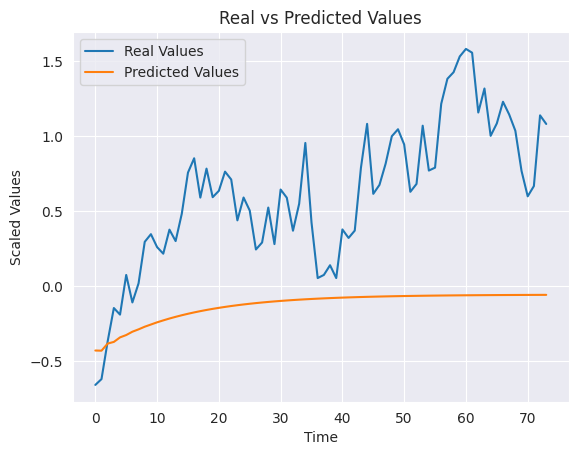

In [ ]:
time = np.arange(len(test))
print(predictions)

# Plotting real values vs predicted values
plt.plot(time, test, label='Real Values')
plt.plot(time, predictions, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()
